# Assignment 1

### Folkert Stijnman - 10475206



<img style="float: left;" src="problem1.png">

In [1]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sir(y, t, beta, gamma):
    S, I, R = y
    
    
    ds_dt = - beta * S * I
    di_dt = beta * S * I - gamma * I
    dr_dt = gamma * I
    
    return([ds_dt, di_dt, dr_dt])

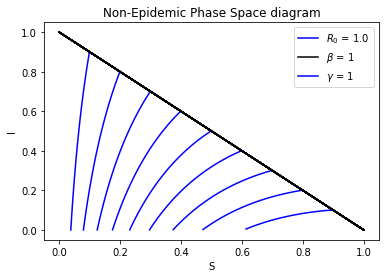

In [3]:
S = np.arange(0.099, 1, 0.1)
I = np.append(np.flip(np.arange(0.001, 1, 0.1)), np.repeat(0.001, 10))

R_0 = 0
beta = 1
gamma = 1

t = np.linspace(0, 10, 100)

for i in range(20):
    j = i % 10
    if S[j] > gamma/beta or I[i] > 0.001:
        solution = scipy.integrate.odeint(sir, [S[j], I[i], R_0], t, args=(beta,gamma))
        plt.plot(solution[:,0], solution[:,1], color="blue")
    plt.plot([0, 1], [1, 0], color="black")
    plt.legend(["$R_0$ = {0}".format(beta/gamma), "$\\beta$ = {0}".format(beta), "$\\gamma$ = {0}".format(gamma)])
    plt.title("Non-Epidemic Phase Space diagram")
    plt.xlabel("S")
    plt.ylabel("I")
    plt.savefig("non-epidemic.png")

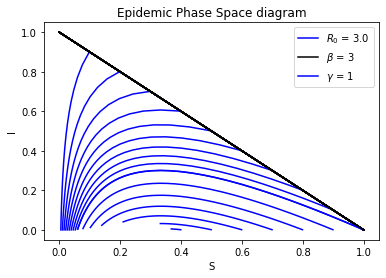

In [4]:
S = np.arange(0.099, 1, 0.1)
I = np.append(np.flip(np.arange(0.001, 1, 0.1)), np.repeat(0.001, 10))

R_0 = 0
beta = 3
gamma = 1

t = np.linspace(0, 10, 100)

for i in range(20):
    j = i % 10
    if S[j] > gamma/beta or I[i] > 0.001:
        solution = scipy.integrate.odeint(sir, [S[j], I[i], R_0], t, args=(beta,gamma))
        plt.plot(solution[:,0], solution[:,1], color="blue")
    plt.plot([0, 1], [1, 0], color="black")
    plt.legend(["$R_0$ = {0}".format(beta/gamma), "$\\beta$ = {0}".format(beta), "$\\gamma$ = {0}".format(gamma)])
    plt.title("Epidemic Phase Space diagram")
    plt.xlabel("S")
    plt.ylabel("I")
    plt.savefig("epidemic.png")

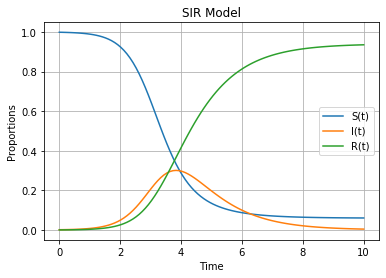

In [5]:
plt.figure(figsize=[6, 4])
plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="I(t)")
plt.plot(t, solution[:, 2], label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SIR Model")
plt.show()

In [24]:
from scipy.optimize import least_squares

t = np.linspace(0, 15, 15)
I_data = [1, 3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5]

def sir(y, t, beta, gamma):
    S, I, R = y
    
    
    ds_dt = - beta * S * I
    di_dt = beta * S * I - gamma * I
    dr_dt = gamma * I
    
    return([ds_dt, di_dt, dr_dt])

def sir_integrate(variables, t, data):

    return data - scipy.integrate.odeint(sir, [762, 1, 0], t, args=(variables[0],variables[1]))[:,1]

variables = [0, 0]
res_lsq = least_squares(sir_integrate, variables, args=(t, I_data))
variables_lsq = res_lsq.x

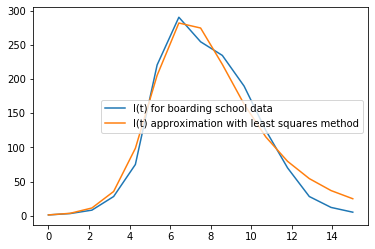

Found beta = 0.0020368392102385856 and gamma = 0.41776934364074053


In [33]:
solution = scipy.integrate.odeint(sir, [762, 1, 0], t, args=(variables_lsq[0],variables_lsq[1]))

plt.plot(t, I_data, label="I(t) for boarding school data")
plt.plot(t, solution[:, 1], label="I(t) approximation with least squares method")
# plt.legend([r"$\beta = {0}$".format(variables_lsq[0]), r"$\gamma = {0}$".format(variables_lsq[1])])
plt.legend()
plt.show()
print("Found beta = {0} and gamma = {1}".format(variables_lsq[0], variables_lsq[1]))